In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diabetes = load_diabetes(as_frame=True)

In [3]:
data = diabetes['data']
data['target'] = diabetes['target']
display(data)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [5]:
data.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [20]:
corr = data.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


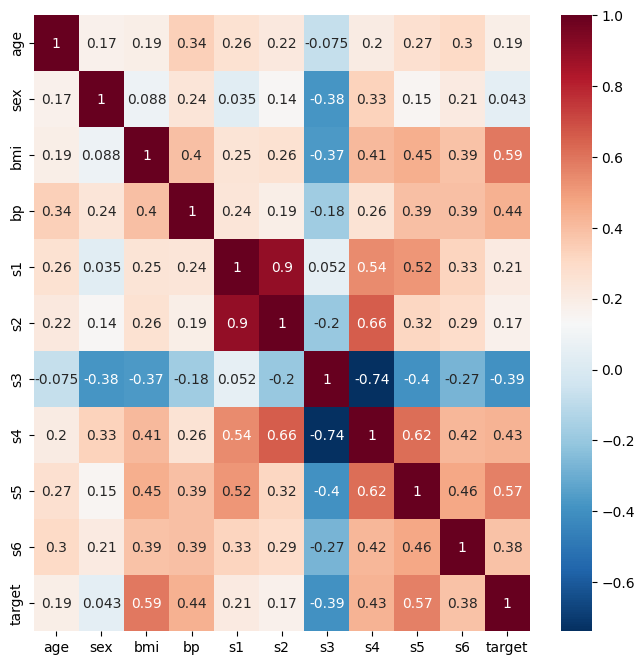

In [21]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.show()

In [4]:
x = data.drop('target', axis=1)
y = data['target']

In [5]:
def get_classifiers():
    c1 = DummyRegressor(strategy='mean')
    c2 = DummyRegressor(strategy='median')
    c3 = DummyRegressor(strategy='quantile', quantile=0.0)
    c4 = DummyRegressor(strategy='constant', constant=0.50)
    c5 = LinearRegression()
    return [c1, c2, c3, c4, c5]

c1, c2, c3, c4, c5 = get_classifiers()

In [6]:
def regression_metrics(y_true, y_pred):

    mse = mean_squared_error(y_true, y_pred, squared=True)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true,y_pred)

    print("1) The model explains,", np.round(explained_variance_score(y_true,y_pred) * 100, 2),"% variance of the target w.r.t features is")
    print("2) The Mean Absolute Error of model is:", np.round(mae, 2))
    print("3) The Mean Squared Error of model is:", np.round(mse, 2))
    print("4) The Root Mean Squared Error of model is:", np.round(rmse, 2))
    print("5) The R-Square score of the model is " , np.round(r2, 2))

# Holdout

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
print(x_train)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
348  0.030811 -0.044642 -0.020218 -0.005670 -0.004321 -0.029497  0.078093   
349  0.001751  0.050680 -0.057941 -0.043542 -0.096510 -0.047034 -0.098625   
350 -0.027310  0.050680  0.060618  0.107944  0.012191 -0.017598 -0.002903   
351 -0.085430  0.050680 -0.040696 -0.033213 -0.081374 -0.069580 -0.006584   
352  0.012648  0.050680 -0.071952 -0.046985 -0.051103 -0.097137  0.118591   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [8]:
c1.fit(x_train, y_train)
c1.score(x_test, y_test)
y_pred = c1.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 70.24
3) The Mean Squared Error of model is: 6432.34
4) The Root Mean Squared Error of model is: 80.2
5) The R-Square score of the model is  -0.0


In [9]:
c2.fit(x_train, y_train)
c2.score(x_test, y_test)
y_pred = c2.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 70.0
3) The Mean Squared Error of model is: 6610.29
4) The Root Mean Squared Error of model is: 81.3
5) The R-Square score of the model is  -0.03


In [10]:
c3.fit(x_train, y_train)
c3.score(x_test, y_test)
y_pred = c3.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 129.73
3) The Mean Squared Error of model is: 23251.73
4) The Root Mean Squared Error of model is: 152.49
5) The R-Square score of the model is  -2.62


In [11]:
c4.fit(x_train, y_train)
c4.score(x_test, y_test)
y_pred = c4.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 154.23
3) The Mean Squared Error of model is: 30208.77
4) The Root Mean Squared Error of model is: 173.81
5) The R-Square score of the model is  -3.7


In [12]:
c5.fit(x_train, y_train)
c5.score(x_test, y_test)
y_pred = c5.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 54.38 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 42.55
3) The Mean Squared Error of model is: 2929.9
4) The Root Mean Squared Error of model is: 54.13
5) The R-Square score of the model is  0.54


# Random

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train)

          age       sex       bmi        bp        s1        s2        s3  \
391 -0.023677 -0.044642 -0.069797 -0.064199 -0.059359 -0.050478  0.019187   
368 -0.016412  0.050680  0.002417  0.014987  0.021822 -0.010082 -0.024993   
15  -0.052738  0.050680 -0.018062  0.080401  0.089244  0.107662 -0.039719   
32   0.034443  0.050680  0.125287  0.028758 -0.053855 -0.012900 -0.102307   
136 -0.092695 -0.044642 -0.081653 -0.057313 -0.060735 -0.068014  0.048640   
..        ...       ...       ...       ...       ...       ...       ...   
244 -0.060003  0.050680  0.054152 -0.019442 -0.049727 -0.048912  0.022869   
188  0.005383 -0.044642 -0.002973  0.049415  0.074108  0.070710  0.044958   
264  0.034443  0.050680  0.028284 -0.033213 -0.045599 -0.009769 -0.050764   
288  0.070769  0.050680 -0.016984  0.021872  0.043837  0.056305  0.037595   
184  0.016281 -0.044642  0.023973 -0.022885 -0.024960 -0.026053 -0.032356   

           s4        s5        s6  
391 -0.039493 -0.089133 -0.050783  
368

In [14]:
c1.fit(x_train, y_train)
c1.score(x_test, y_test)
y_pred = c1.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 71.35
3) The Mean Squared Error of model is: 6755.17
4) The Root Mean Squared Error of model is: 82.19
5) The R-Square score of the model is  -0.01


In [15]:
c2.fit(x_train, y_train)
c2.score(x_test, y_test)
y_pred = c2.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 69.29
3) The Mean Squared Error of model is: 6732.37
4) The Root Mean Squared Error of model is: 82.05
5) The R-Square score of the model is  -0.0


In [16]:
c3.fit(x_train, y_train)
c3.score(x_test, y_test)
y_pred = c3.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 115.89
3) The Mean Squared Error of model is: 20108.49
4) The Root Mean Squared Error of model is: 141.8
5) The R-Square score of the model is  -2.0


In [17]:
c4.fit(x_train, y_train)
c4.score(x_test, y_test)
y_pred = c4.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 0.0 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 146.25
3) The Mean Squared Error of model is: 28099.67
4) The Root Mean Squared Error of model is: 167.63
5) The R-Square score of the model is  -3.19


In [18]:
c5.fit(x_train, y_train)
c5.score(x_test, y_test)
y_pred = c5.predict(x_test)

regression_metrics(y_test, y_pred)

1) The model explains, 48.39 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 47.58
3) The Mean Squared Error of model is: 3491.13
4) The Root Mean Squared Error of model is: 59.09
5) The R-Square score of the model is  0.48


# Stratified random

target isn't categorical so we cannot apply the stratified random method unless we convert the target to categorical (in this case does not apply)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(x_train)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.